# Cabinet Start-Up Procedure

1. Turn on cabinet power in back of cabinet
2. Turn on sensor power (24 Volts). The sensor power inputs are labeled.
3. Compile code to AMDC
4. Turn on power to DC bus of cabinet.
5. Run Jupyter Notebook. 

Import neccessary modules

In [633]:
amdc.disconnect()

In [634]:
from Cabinet_Test import cmd
import sys
sys.path.append(r'..\AMDC-Firmware\scripts')
from AMDC import AMDC
amdc = AMDC(port = 'COM13', cmdEcho = True, printOutput=True)
Vdc = 40
cmd = cmd(Vdc, amdc, debug = False) 

	> cabinet setup 40.00000
['cabinet setup 40.00000', 'SUCCESS']
	> cabinet init_cb
['cabinet init_cbENC:\tSetting pulses per rev bits = 10...', '', 'SUCCESS']


In [635]:
  
cmd.disable_pwm()



	> hw pwm off
['hw pwm off', 'FAILURE']


In [636]:
cmd.BIM_init()
cmd.BIM_set_Vdc(40)
cmd.enable_pwm()
cmd.BIM_enable_ctrl()

	> BIM init
['BIM initENC:\tSetting pulses per rev bits = 10...', '', 'SUCCESS']
	> BIM set_vdc 40.000000
['BIM set_vdc 40.000000', 'SUCCESS']
	> hw pwm on
['hw pwm on', 'SUCCESS']
	> BIM enable_ctrl
['BIM enable_ctrl', 'SUCCESS']


In [637]:

cmd.BIM_enable_ob()
cmd.BIM_enable_vctrl()

cmd.BIM_enable_levctrl()
cmd.BIM_set_id(6)

	> BIM enable_ob
['BIM enable_ob', 'SUCCESS']
	> BIM enable_vctrl
['BIM enable_vctrl', 'SUCCESS']
	> BIM enable_levctrl
['BIM enable_levctrl', 'SUCCESS']
	> BIM set_id 6.000000
['BIM set_id 6.000000', 'SUCCESS']


In [607]:
import matplotlib
import time
import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)

from AMDC_Logger import AMDC_Logger, find_mapfile
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()
#amdc.connect()
cmd.twin_enable_log()

	> log info
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:

	> twin enable_log
['twin enable_log', 'SUCCESS']


In [608]:
logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
#logger.register('theta_rm wrm wsl theta_e we Itq_d_ref Itq_q_ref Itq_d Itq_q Te', samples_per_sec = 1000, var_type = 'double')
#logger.register('theta_rm theta_e wsl', samples_per_sec = 1000, var_type = 'double')
logger.register('wsl wrm theta_e theta_rm Itq_d_ref Itq_q_ref Itq_d Itq_q va1_ref vb1_ref vc1_ref va2_ref vb2_ref vc2_ref Is1_x Is1_y Is1_x_ref Is1_y_ref delta_x delta_y', samples_per_sec = 1000, var_type = 'double')



# View which variables are logged
logger.info()


	> log reg 0 LOG_wsl 1232672 1000 double
['log reg 0 LOG_wsl 1232672 1000 double', 'SUCCESS']
	> log reg 1 LOG_wrm 1232648 1000 double
['log reg 1 LOG_wrm 1232648 1000 double', 'SUCCESS']
	> log reg 2 LOG_theta_e 1232680 1000 double
['log reg 2 LOG_theta_e 1232680 1000 double', 'SUCCESS']
	> log reg 3 LOG_theta_rm 1232656 1000 double
['log reg 3 LOG_theta_rm 1232656 1000 double', 'SUCCESS']
	> log reg 4 LOG_Itq_d_ref 1232576 1000 double
['log reg 4 LOG_Itq_d_ref 1232576 1000 double', 'SUCCESS']
	> log reg 5 LOG_Itq_q_ref 1232584 1000 double
['log reg 5 LOG_Itq_q_ref 1232584 1000 double', 'SUCCESS']
	> log reg 6 LOG_Itq_d 1232608 1000 double
['log reg 6 LOG_Itq_d 1232608 1000 double', 'SUCCESS']
	> log reg 7 LOG_Itq_q 1232616 1000 double
['log reg 7 LOG_Itq_q 1232616 1000 double', 'SUCCESS']
	> log reg 8 LOG_va1_ref 1232704 1000 double
['log reg 8 LOG_va1_ref 1232704 1000 double', 'SUCCESS']
	> log reg 9 LOG_vb1_ref 1232712 1000 double
['log reg 9 LOG_vb1_ref 1232712 1000 double', 'SUCC

In [613]:
###################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()
#DATA IS BEING RECORDED
time.sleep(0.05)

logger.stop()

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'BIM_data_delta.csv')


	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']
	> log dump bin 0
Dumping: LOG_wsl
Dump took: 0.477  sec
Dump rate: 861.630  sps
Num samples: 411 

	> log dump bin 1
Dumping: LOG_wrm
Dump took: 0.468  sec
Dump rate: 878.148  sps
Num samples: 411 

	> log dump bin 2
Dumping: LOG_theta_e
Dump took: 0.462  sec
Dump rate: 889.645  sps
Num samples: 411 

	> log dump bin 3
Dumping: LOG_theta_rm
Dump took: 0.471  sec
Dump rate: 872.559  sps
Num samples: 411 

	> log dump bin 4
Dumping: LOG_Itq_d_ref
Dump took: 0.469  sec
Dump rate: 876.266  sps
Num samples: 411 

	> log dump bin 5
Dumping: LOG_Itq_q_ref
Dump took: 0.469  sec
Dump rate: 876.243  sps
Num samples: 411 

	> log dump bin 6
Dumping: LOG_Itq_d
Dump took: 0.468  sec
Dump rate: 878.133  sps
Num samples: 411 

	> log dump bin 7
Dumping: LOG_Itq_q
Dump took: 0.466  sec
Dump rate: 881.938  sps
Num samples: 411 

	> log dump bin 8
Dumping: LOG_va1_ref
Dump took: 0.467

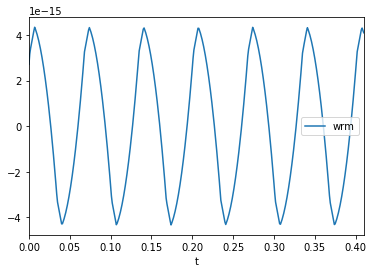

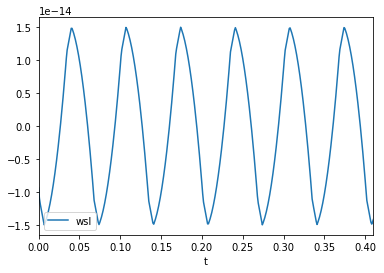

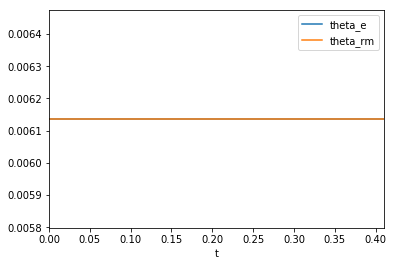

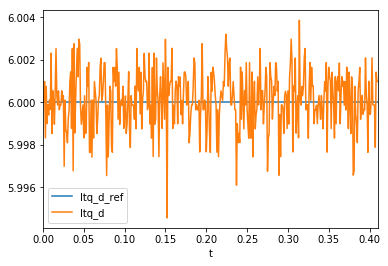

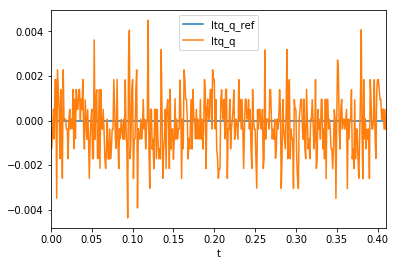

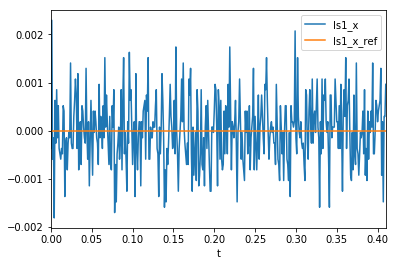

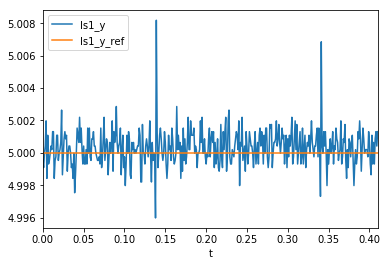

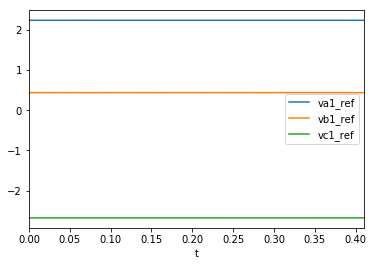

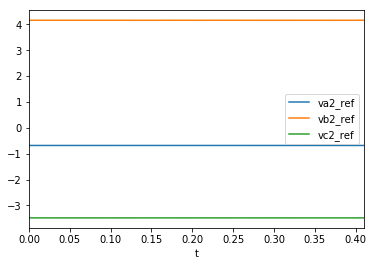

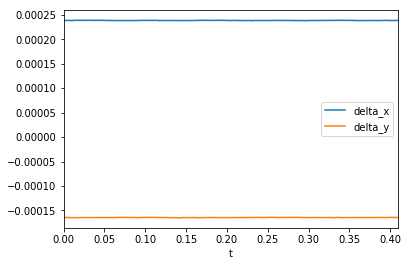

In [614]:

data.filter(regex="^wrm$").plot()
#data.filter(regex="^we$").plot()
data.filter(regex="^wsl$").plot()
data.filter(regex="^theta_e|theta_rm$").plot()
#data.filter(regex="^theta_rm$").plot()
data.filter(regex="^Itq_d_ref|Itq_d$").plot()
data.filter(regex="^Itq_q_ref|Itq_q$").plot()
data.filter(regex="^Is1_x_ref|Is1_x$").plot()
data.filter(regex="^Is1_y_ref|Is1_y$").plot()

data.filter(regex="^va1_ref|vb1_ref|vc1_ref$").plot()
data.filter(regex="^va2_ref|vb2_ref|vc2_ref$").plot()
#data.filter(regex="^Te$").plot()

data.filter(regex="^delta_x|delta_y$").plot()

In [ ]:
cmd.BIM_enable_ob()

In [ ]:
cmd.BIM_set_Te(0.2)

In [ ]:
cmd.BIM_enable_vctrl()

cmd.BIM_set_w(0)
#cmd.BIM_set_id(10)

In [612]:
cmd.BIM_set_ixy(0, 5)
cmd.BIM_set_id(6)
#cmd.BIM_enable_levctrl()

	> BIM set_ixy_ref 0.000000 5.000000
['BIM set_ixy_ref 0.000000 5.000000', 'SUCCESS']
	> BIM set_id 6.000000
['BIM set_id 6.000000', 'SUCCESS']


In [615]:
cmd.disable_pwm()


	> hw pwm off
['hw pwm off', 'SUCCESS']


In [ ]:
amdc.disconnect()
#amdc.connect()

## Logging


In [ ]:
import matplotlib
import time
import pathlib as pl
import sys
repo_dir = '..'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)

from AMDC_Logger import AMDC_Logger, find_mapfile
mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

# View which variables are logged
logger.info()
#amdc.connect()
cmd.twin_enable_log()

In [ ]:
logger.unregister_all()
#logger.register('Ia1_a Ia1_b Ia1_c Ib1_a Ib1_b Ib1_c Ia2_a Ia2_b Ia2_c Ib2_a Ib2_b Ib2_c', samples_per_sec = 1000, var_type = 'double')
#logger.register('theta_rm wrm wsl theta_e we Itq_d_ref Itq_q_ref Itq_d Itq_q Te', samples_per_sec = 1000, var_type = 'double')
logger.register('theta_rm theta_e wrm', samples_per_sec = 1000, var_type = 'double')



# View which variables are logged
logger.info()

###################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all()
logger.start()


In [ ]:

#DATA IS BEING RECORDED
time.sleep(1)

logger.stop()


In [ ]:
####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'BIM_data_pos.csv')


In [ ]:
data.filter(regex="^wrm$").plot()
#data.filter(regex="^we$").plot()
#data.filter(regex="^wsl$").plot()
data.filter(regex="^theta_e|theta_rm$").plot()
#data.filter(regex="^theta_rm$").plot()
#data.filter(regex="^Itq_d_ref|Itq_d$").plot()
#data.filter(regex="^Itq_q_ref|Itq_q$").plot()
#data.filter(regex="^Te$").plot()


In [ ]:

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'BIM_data_pos.csv')
#data


In [ ]:
data.filter(regex="^wrm$").plot()
#data.filter(regex="^we$").plot()
data.filter(regex="^wsl$").plot()
data.filter(regex="^theta_e|theta_rm$").plot()
#data.filter(regex="^theta_rm$").plot()
data.filter(regex="^Itq_d_ref|Itq_d$").plot()
data.filter(regex="^Itq_q_ref|Itq_q$").plot()
data.filter(regex="^Te$").plot()


In [ ]:
logger.unregister_all()
logger.register('Iabc1_a Iabc1_b Iabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
#time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data_Iabc.csv')
#data

data.filter(regex="^Iabc1_a|Iabc1_b|Iabc1_c$").plot()

In [ ]:
logger.unregister_all()
#logger.register('Itq_d_ref Itq_q_ref Itq_d Itq_q Is1_d_ref Is1_q_ref Is1_d Is1_q Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')
logger.register('va_ref vb_ref vc_ref', samples_per_sec = 1000, var_type = 'double')
# View which variables are logged
logger.info()

logger.clear_all()
logger.start()
time.sleep(0.5)
logger.stop()

data = logger.dump(file = 'BIM_data_Idq.csv')
#data

data.filter(regex="^va_ref|vb_ref|vc_ref$").plot()
#data.filter(regex="^Itq_q_ref|Itq_q$").plot()
#data.filter(regex="^Te_ref$").plot()

In [ ]:
data.filter(regex="^Ib1_a|Ib1_b|Ib1_c$").plot()

In [ ]:
data.filter(regex="^Iabc2_a|Iabc2_b|Iabc2_c$").plot()

In [ ]:
data.filter(regex="^Iabc3_a|Iabc3_b|Iabc3_c$").plot()

In [ ]:
logger.unregister_all()
logger.register('vabc1_a vabc1_b vabc1_c', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^vabc1_a|vabc1_b|vabc1_c$").plot()

In [ ]:

data = logger.dump(file = 'BIM_data.csv')
data


In [ ]:
data.filter(regex="^Itq_d_ref|Itq_q_ref|Itq_d$|Itq_q").plot()
#data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()
#data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is1_d_ref Is1_q_ref Is1_d Is1_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()


In [ ]:
#data = logger.dump(file = 'test_data.csv')
#data
data.filter(regex="^Is1_d_ref|Is1_q_ref|Is1_d|Is1_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('Is2_d_ref Is2_q_ref Is2_d Is2_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^Is2_d_ref|Is2_q_ref|Is2_d|Is2_q$").plot()

In [ ]:

logger.unregister_all()
logger.register('v_tq_d v_tq_q', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^v_tq_d|v_tq_q$").plot()

In [ ]:
logger.unregister_all()
logger.register('we_tq', samples_per_sec = 1000, var_type = 'double')

# View which variables are logged
logger.info()

logger.clear_all()
logger.start()

# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

data = logger.dump(file = 'test_data.csv')
data

data.filter(regex="^we_tq$").plot()